In [42]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mticker # Label format 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib.ticker import ScalarFormatter # Label format
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score #Metrics


df = pd.read_csv('bd.csv')




In [43]:
#vNumeros de dados com fraude e sem fraude
Num_of_Fraud = round(df['isFraud'].value_counts()[1]/len(df)*100,3)
Num_of_NonFraud = round(df['isFraud'].value_counts()[0]/len(df)*100,3)


print("Numero de valores com fraudes :\t\t  \t   ",df['isFraud'].value_counts()[1])
print("Number de valores sem fraudes :\t\t        ",df['isFraud'].value_counts()[0])
print("\n")
print("Porcentagem de transação com fraude :  \t\t ", Num_of_Fraud)
print("Porcentagem de transação sem fraude :  \t\t ",Num_of_NonFraud)

Numero de valores com fraudes :		  	    2851
Number de valores sem fraudes :		         3274262


Porcentagem de transação com fraude :  		  0.087
Porcentagem de transação sem fraude :  		  99.913


In [44]:
#informar dados da dimenção dos dados sendo estudados
shape = df.shape
print("dimensões dos dados = ",shape)
Feature_Size = len(df.columns)
Columns_Index = Feature_Size -1 
print("quantidade de colunas = ",Feature_Size)
print("colunas alvo = ",Columns_Index)
df.head()

dimensões dos dados =  (3277114, 11)
quantidade de colunas =  11
colunas alvo =  10


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [45]:
#plotagem para mostrar os tipos de transações
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df, 
             values=quantity, 
             names=transactions,hole = 0.5, 
             title="Tipos de transações")
figure.show()

In [55]:
def my_catplot(feature=None, ax=None):
    sns.countplot(data=df[:100000], x=feature, hue='isFraud', palette=(palette[0], palette[-1]), ax=ax)
    ax.set_ylabel('Numero de Observações')
    ax.set_xlabel(f'{feature}')

def my_histplot(feature=None, ax=None):
    sns.histplot(data=df[:100000], 
                         x=feature, 
                         hue='isFraud', 
                         kde=True, 
                         element='step', 
                         palette=(palette[0], 
                                  palette[-1]), 
                         ax=ax,
                         log_scale=True)
    ax.set_ylabel('Numero de Observações')
    ax.set_xlabel(f'{feature}')
    mean_value_f = df[df['isFraud']==False][feature].mean()
    mean_value_t = df[df['isFraud']==True][feature].mean()
    ax.axvline(x=mean_value_f, 
               color=palette[0])
    ax.axvline(x=mean_value_t, 
                color=palette[-1])
    ax.annotate(f'Valor médio \n para transações regulares: ${mean_value_f:,.2f}', 
                 xy=(0.1, 0.5),
                 xycoords='axes fraction')
    ax.annotate(f'Valor médio \n das transações fraudulentas: ${mean_value_t:,.2f}', 
                 xy=(0.1, 0.3),
                 xycoords='axes fraction')
    


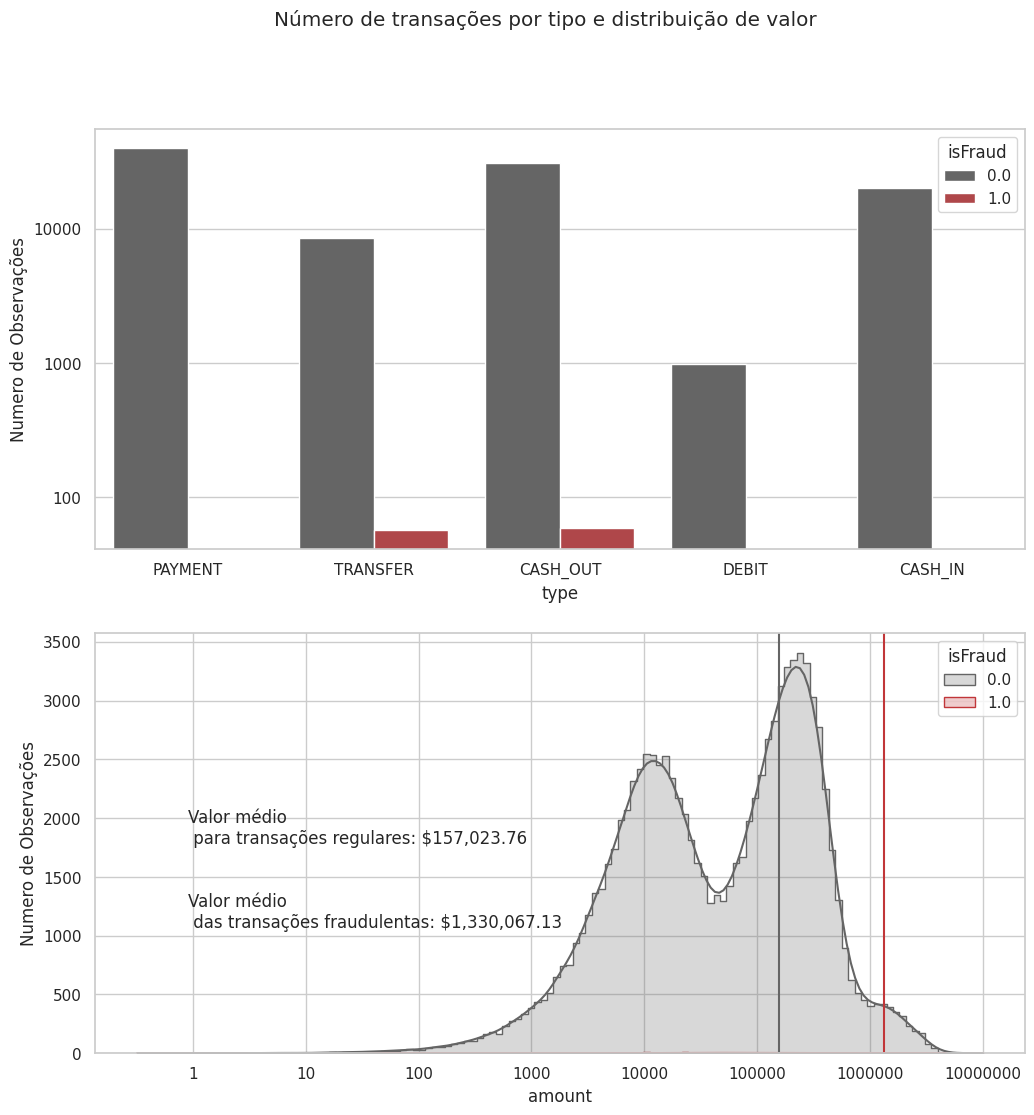

In [56]:
#Setting styles for charts
sns.set_style('whitegrid')
sns.set_context('notebook')
sns.set_palette('RdGy_r')

palette = sns.color_palette('RdGy_r')

#Creating visualizations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
fig.suptitle('Número de transações por tipo e distribuição de valor')

my_catplot('type', ax1)
ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(mticker.ScalarFormatter())

my_histplot('amount', ax2)
ax2.xaxis.set_major_formatter(mticker.ScalarFormatter())
ax2.ticklabel_format(style='plain', axis='x')


plt.show()

In [23]:
#trocar os tipos de transações para valores em inteiro
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5})

#dividindo os dados
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

# funçoes para que não exista valores NAN
x = np.nan_to_num(x)
y = np.nan_to_num(y)

#setando os treinamentos e os testes
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [24]:
#instanciando a regressao logistica
model = LogisticRegression()

#treinando o modelo
model.fit(xtrain, np.squeeze(ytrain))

#calcular as previsões do modelo
ypred = model.predict(xtest)


accuracy = accuracy_score(ytest, ypred)
plt.show()
print("Precisão do modelo: ", accuracy)

#resumo do modelo
print(classification_report(ytest, ypred))

Precisão do modelo:  0.9998643287802071
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    184162
         1.0       0.84      0.95      0.89       107

    accuracy                           1.00    184269
   macro avg       0.92      0.98      0.95    184269
weighted avg       1.00      1.00      1.00    184269

